In [1]:
import pandas as pd
import numpy as np 
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing
# from functions import *

# functions
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    
    """display the correlation circle 

    Keyword arguments:
    
    pcs --------- pca.components_  to define the direction of the vector and lenght of vectors
    n_comp ------ number of components to be analysed 
    axis_ranks -- a tuple of the axis to be draw in a list
    labels ------ label of each components    
        
    """
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(11,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    
    """display the factoral planes 

    Keyword arguments:
    
    X_projected -- pca.transform(X) : X is projected on the first principal components previously extracted from a training set.
    n_comp ------- number of components to be analysed 
    axis_ranks --- a tuple of the axis to be draw in a list
    labels ------- label of each components or None   
    
    """
    
        
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(11,10))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree) 
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
    
# fin de la définition des fonctions    

    
# choix du nombre de composantes à calculer
n_comp = 4

# import de l'échantillon
data_base = pd.read_csv("food_france_main_cat.csv",decimal=".",index_col=0)
data = data_base[["energy_100g","fat_100g","carbohydrates_100g","proteins_100g"]]


       energy_100g     fat_100g  carbohydrates_100g  proteins_100g
count  6820.000000  6820.000000         6820.000000    6820.000000
mean   1156.446609     9.856675           37.980240       7.243071
std     710.586686    11.002532           26.537432       4.570731
min       0.000000     0.000000            0.000000       0.000000
25%     476.000000     1.900000           12.400000       4.300000
50%    1155.000000     5.400000           35.950000       6.900000
75%    1715.000000    14.800000           64.000000       9.500000
max    3017.000000    70.000000           99.000000      39.000000
PCA(n_components=4)


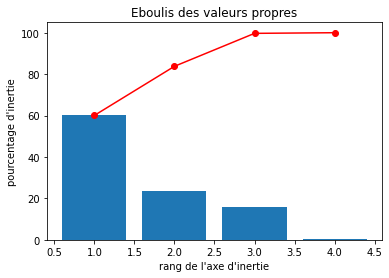

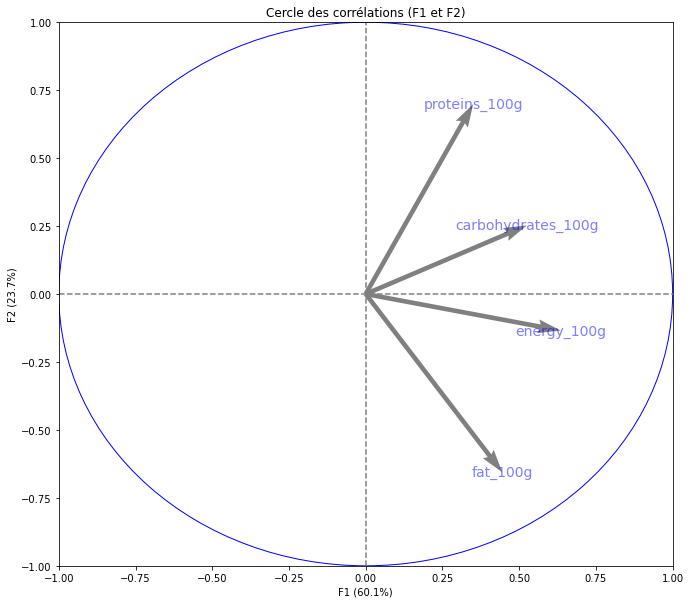

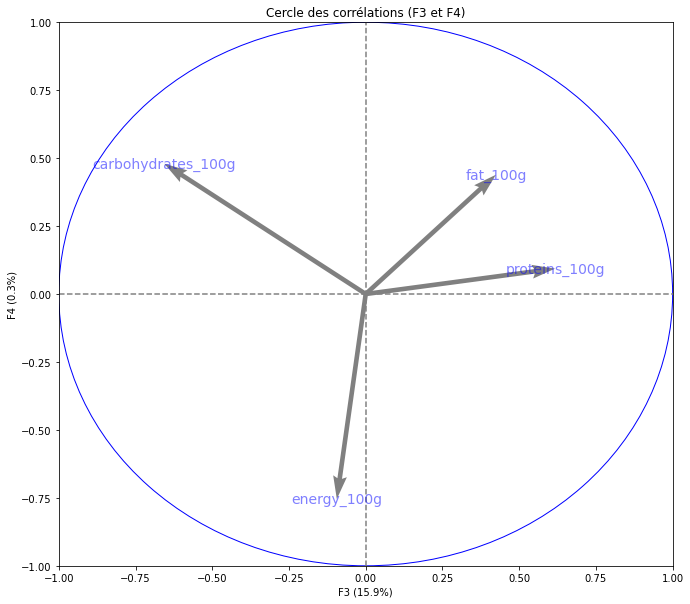

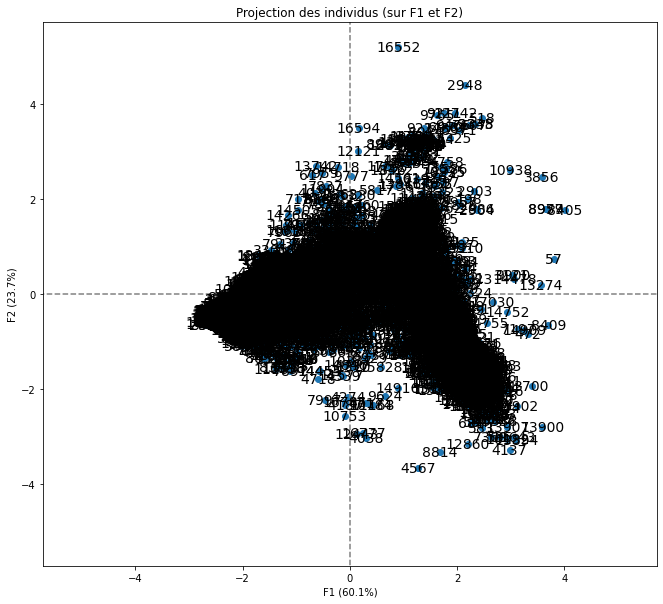

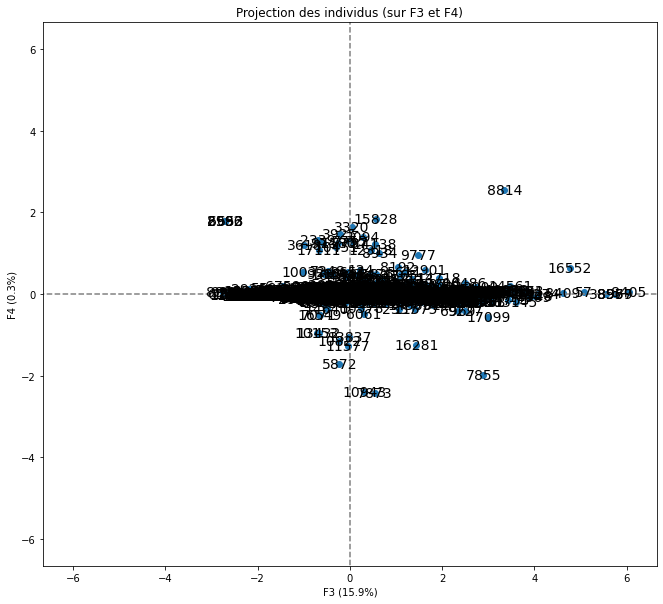

In [2]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["energy_100g","fat_100g","carbohydrates_100g","proteins_100g"]]

print (data_pca.describe())

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.index  # ou data.index ou pour avoir les intitulés data['colonne']
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
print ( pca )
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))


plt.show()

In [3]:
data_pca.describe()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
count,6820.000000,6820.000000,6820.000000,6820.000000
mean,1156.446609,9.856675,37.980240,7.243071
std,710.586686,11.002532,26.537432,4.570731
min,0.000000,0.000000,0.000000,0.000000
25%,476.000000,1.900000,12.400000,4.300000
50%,1155.000000,5.400000,35.950000,6.900000
75%,1715.000000,14.800000,64.000000,9.500000
max,3017.000000,70.000000,99.000000,39.000000


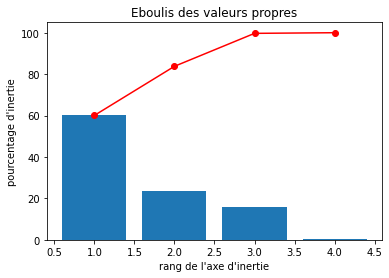

In [4]:
display_scree_plot(pca)

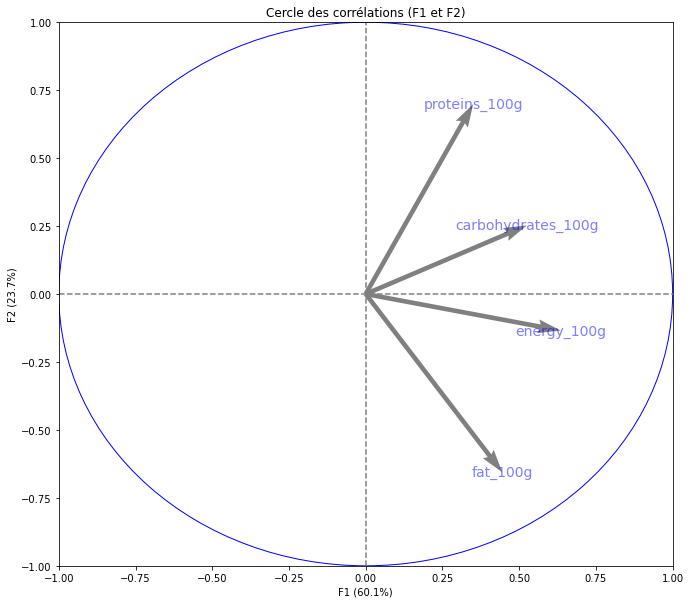

In [5]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

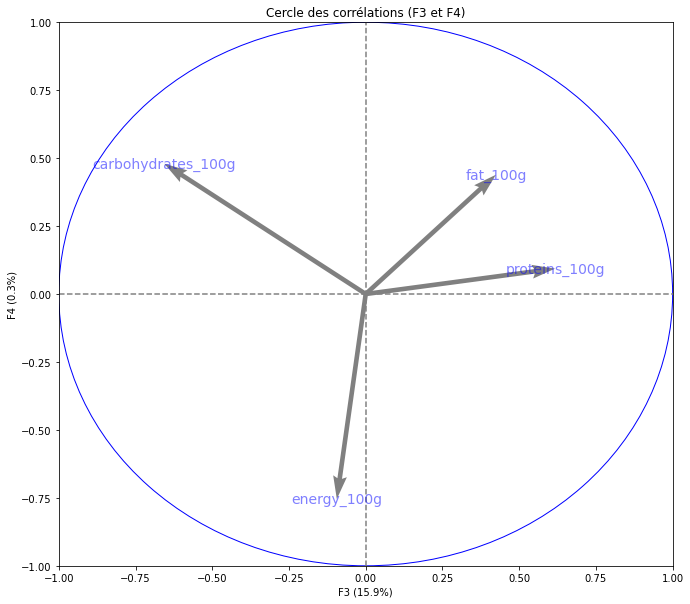

In [6]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))

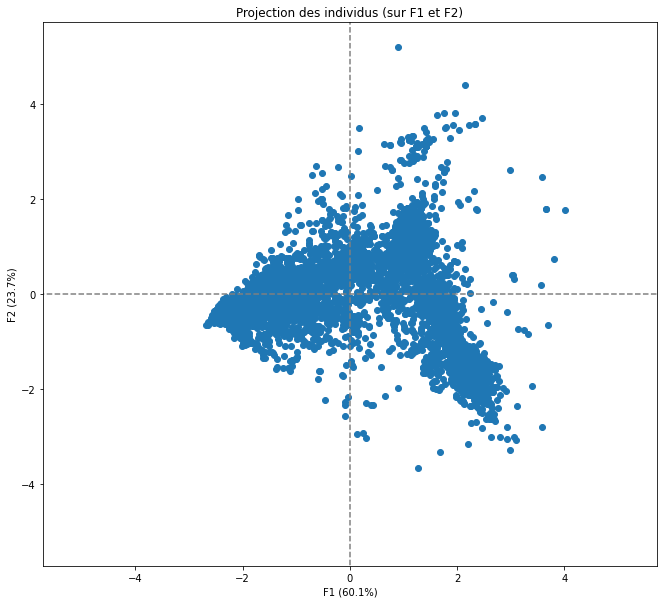

In [7]:
# Projection des individus
X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
display_factorial_planes(X_projected, n_comp, pca, [(0,1)])

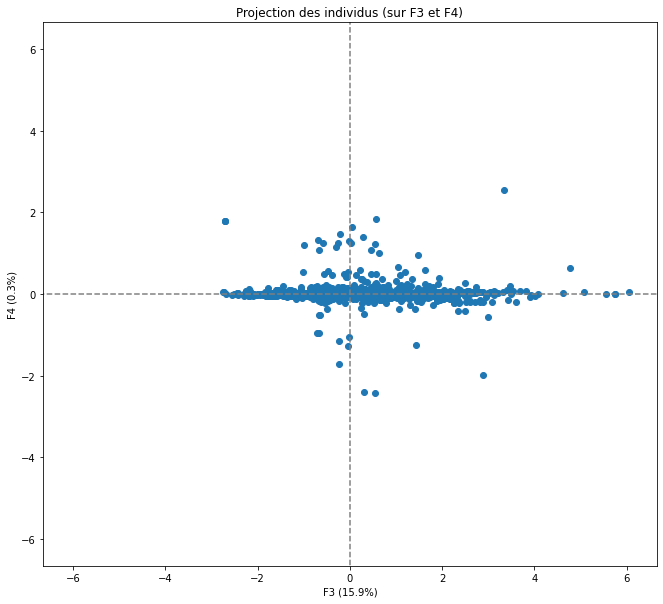

In [8]:
X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
display_factorial_planes(X_projected, n_comp, pca, [(2,3)])

analyse composant principal - methode 2 

In [9]:
from sklearn.preprocessing import StandardScaler
X = data_pca.select_dtypes(include = "number").values
print (X.shape)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) # standardisation : toutes les données à la même échelle

(6820, 4)


In [10]:
from sklearn.decomposition import PCA
pca_4_dim = PCA(n_components = 4, random_state = 2022)
pca_4_dim.fit(X_scaled) #application du PCA sur toutes les dimensions 
print ("Variance expliquée par la totalité des composants : ",
    sum (pca_4_dim.explained_variance_ratio_ * 100))
print (pca_4_dim.explained_variance_ratio_ * 100)

Variance expliquée par la totalité des composants :  99.99999999999999
[60.05060375 23.71639004 15.92295024  0.31005597]


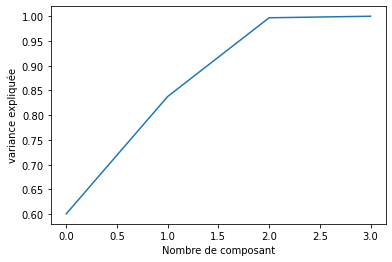

In [11]:
plt.plot(np.cumsum(pca_4_dim.explained_variance_ratio_))
plt.xlabel('Nombre de composant')
plt.ylabel('variance expliquée')
plt.savefig('elbow_plot.png',dpi = 100)

In [12]:
pca_2 = PCA(n_components = 2, random_state = 2022)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

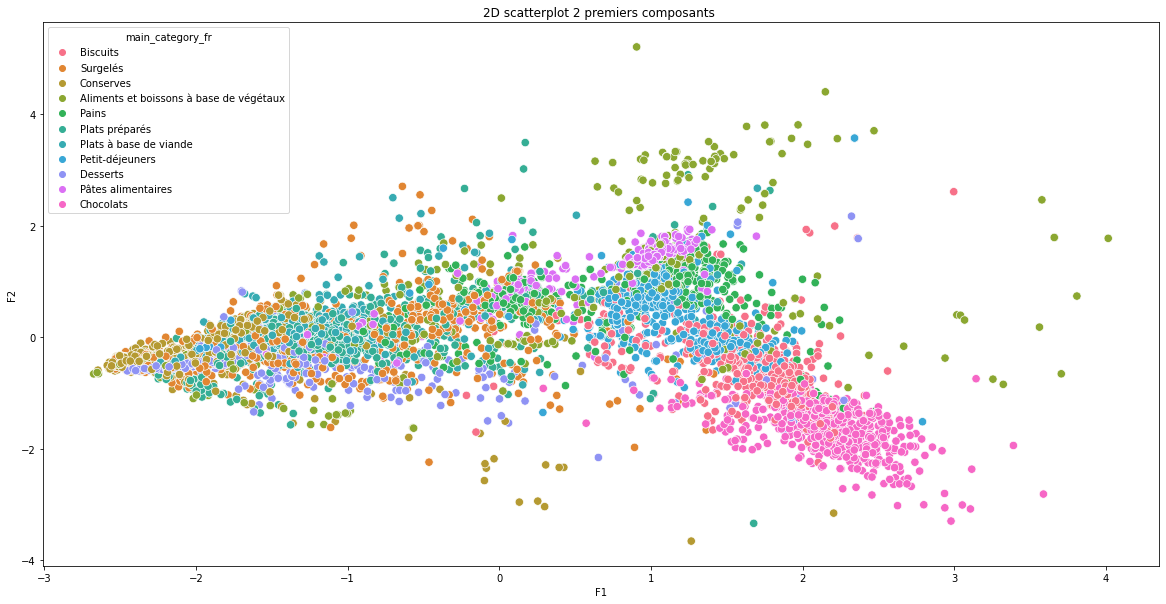

In [13]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=X_pca_2[:,0], y = X_pca_2[:,1], s=70, hue = data_base.main_category_fr)
plt.title('2D scatterplot 2 premiers composants ')
plt.xlabel('F1')
plt.ylabel('F2')
plt.savefig('2D_scatterplot_2_ premiers_composants.png')

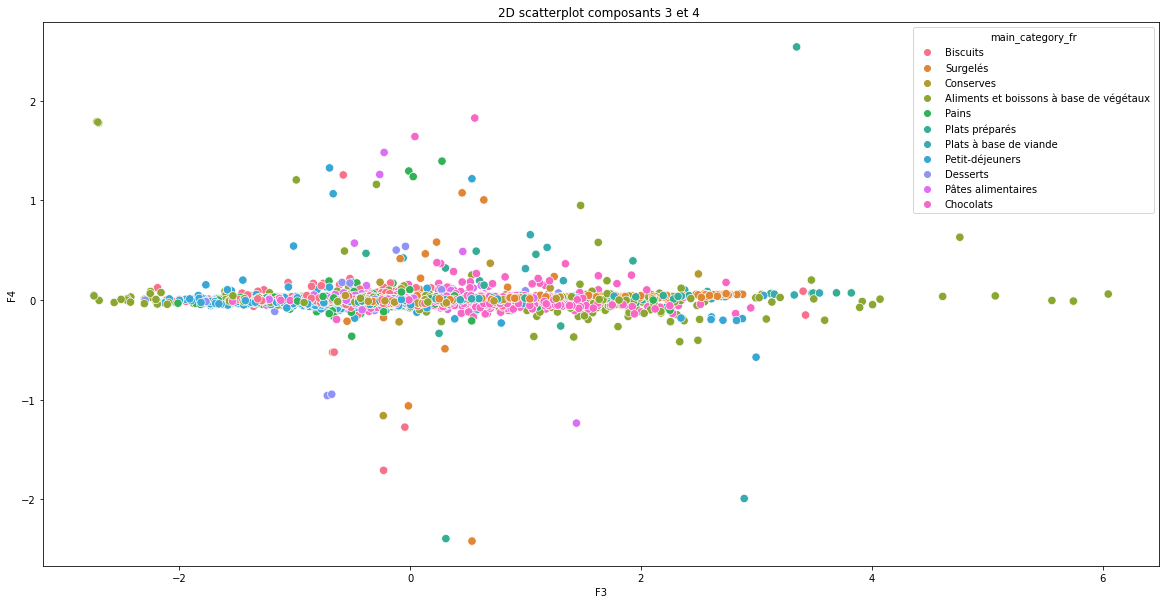

In [14]:
pca_4 = PCA(n_components = 4, random_state = 2022)
pca_4.fit(X_scaled)
X_pca_4 = pca_4.transform(X_scaled)

plt.figure(figsize=(20,10))
sns.scatterplot(x=X_pca_4[:,2], y = X_pca_4[:,3], s=70, hue = data_base.main_category_fr)
plt.title('2D scatterplot composants 3 et 4 ')
plt.xlabel('F3')
plt.ylabel('F4')
plt.savefig('2D_scatterplot_composants_3_4.png')

matrice de corrélation

In [15]:
data_pca.corr() #matrice de corrélation
corr_df = data_pca.corr()

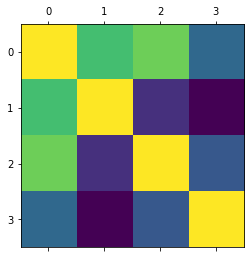

In [16]:
plt.matshow(corr_df)
plt.show()

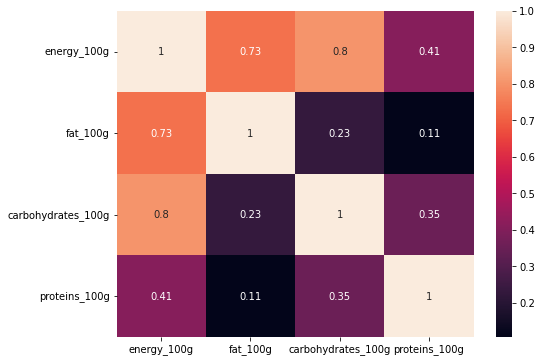

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

covariance matrix 

In [18]:
#matrice de corrélation

In [19]:
covMatrix = pd.DataFrame.cov(data_pca)
print (covMatrix)

                      energy_100g     fat_100g  carbohydrates_100g  \
energy_100g         504933.438702  5730.952838        15167.233341   
fat_100g              5730.952838   121.055720           66.963551   
carbohydrates_100g   15167.233341    66.963551          704.235298   
proteins_100g         1323.250911     5.352453           42.638565   

                    proteins_100g  
energy_100g           1323.250911  
fat_100g                 5.352453  
carbohydrates_100g      42.638565  
proteins_100g           20.891582  


matrice de covariance


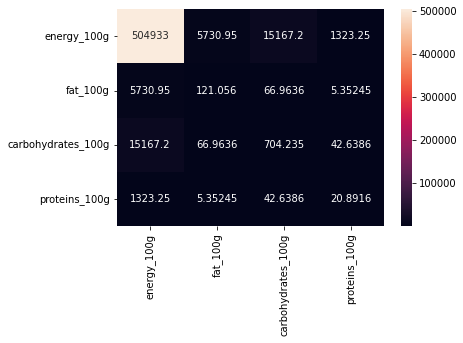

In [20]:
print ( 'matrice de covariance')
sns.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

the diagonal elements represent the variance and the off-diagonal elements represent the covariance. The covariance between two variables can be positive, negative, and zero. A positive covariance indicates that the two variables have a positive relationship whereas negative covariance shows that they have a negative relationship. If two elements do not vary together then they will display a zero covariance.